In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Getting started

In [1]:
# import libraries
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import numpy.matlib
from IPython.display import clear_output

In [2]:
# perceptron function definitions

# generate data for 2 classes (input x and output f(x))
def generate_data(means, sigma, ndatapoints):

    nclasses = 2 # do the data generation for two classes
    data = np.zeros((nclasses * ndatapoints, 3))

    for c in range(0, nclasses):
        starti = c * ndatapoints
        endi = (c + 1) * ndatapoints
        data[starti:endi, 0:2] = means[c] + sigma * random.standard_normal((ndatapoints, 2))
        data[starti:endi, 2] = c
    randvec = np.random.permutation(nclasses * ndatapoints)
    data = data[randvec,:]
    return data, randvec;

# plot the decision boundary
def plot_boundary(weights):
    b = weights[0]; w1 = weights[1]; w2 = weights[2]
    slope = -(b / w2) / (b / w1)
    y_intercept = -b / w2
    x = np.linspace(0,1,100)
    y = (slope * x) + y_intercept
    ax = plt.gca()
    ax.plot(x, y)

def plot_boundary_train(weights, data_train, colors_train):
    b = weights[0]; w1 = weights[1]; w2 = weights[2]
    slope = -(b / w2) / (b / w1)
    y_intercept = -b / w2
    x = np.linspace(0,1,100)
    y = (slope * x) + y_intercept

    clear_output(wait=True)  # clear previous plot but keep the latest
    plt.figure(1)  # use the same figure for all updates

    # replot the training data
    plt.scatter(data_train[:,0], data_train[:,1], c=colors_train, alpha=0.5)

    plt.plot(x, y)  # Plot new decision boundary
    plt.axis('square')
    plt.xlabel('x1 (0 = green, 1 = red)')
    plt.ylabel('x2 (0 = small, 1 = large)')
    plt.title('training data with decision boundary')
    plt.xlim(-10,10); plt.ylim(-10,10)
    plt.show()
    plt.pause(0.1)

# predict output
def predict(inputs, weights):
    summation = np.dot(inputs, weights[1:]) + weights[0]
    if summation > 0:
      prediction = 1
    else:
      prediction = 0
    return prediction

# test perceptron
def test(data, weights):
    inputs_test = data[:,0:2]
    labels = data[:,2]
    npredictions = data.shape[0]
    predictions = np.zeros(npredictions)
    for i in range(0, npredictions):
        predictions[i] = predict(inputs_test[i,:], weights)
    return predictions

### Test a pre-trained perceptron

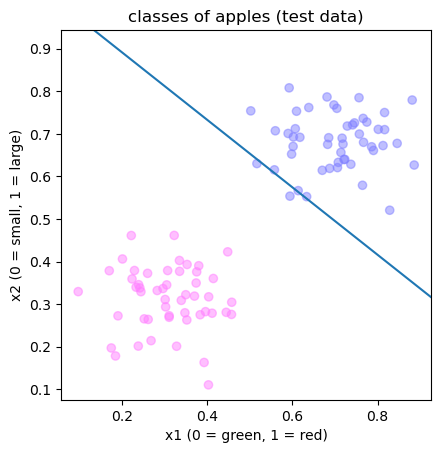

In [3]:
# generate test data
means = (0.3,0.7)
sigma = 0.08
ndatapoints = 50
data_output_test = generate_data(means, sigma, ndatapoints)
data_test = data_output_test[0]
randvec_test = data_output_test[1]

# pretrained weights (b, w1, w2)
weights = np.array([-0.01261552,  0.00952113,  0.01201932])

# show generated data and decision boundary
colors_test = np.concatenate((np.matlib.repmat(np.array([1, 0.5, 1]),ndatapoints,1),np.matlib.repmat(np.array([0.5, 0.5, 1]),ndatapoints,1)))
colors_test = colors_test[randvec_test,:]
figi_test = 2; plt.figure(figi_test)
plt.scatter(data_test[:,0], data_test[:,1], c=colors_test, alpha=0.5)
plt.axis('square')
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (test data)')
plot_boundary(weights)

# inspect predictions
predictions = test(data_test, weights)
labels_test = data_test[:,2]
errors = labels_test - predictions # nonzero entries indicate errors
nerrors = np.sum(errors**2)

### Train the perceptron

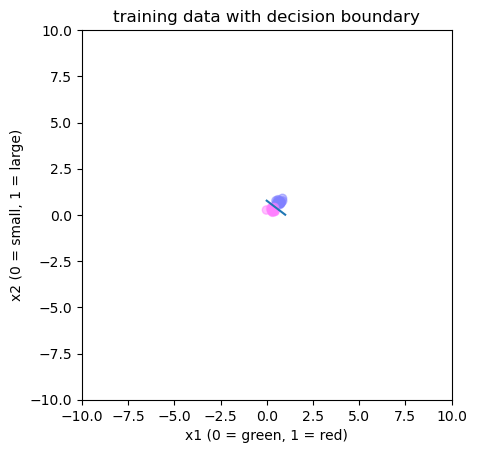

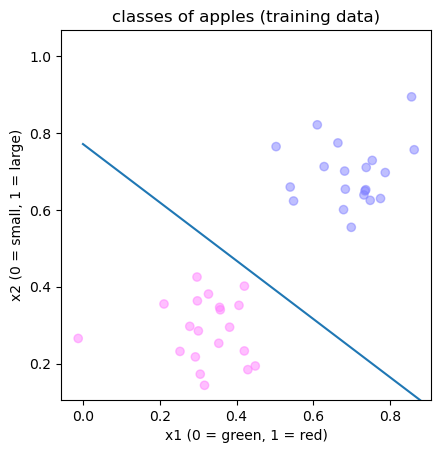

In [4]:
# function definitions
def train(data, learning_rate, niterations):
    training_inputs = data[:,0:2]
    labels = data[:,2]
    weights = 0.001 * random.standard_normal(data.shape[1])
    errors = np.zeros((data.shape[0], niterations))
    j = 0
    for _ in range(niterations):
        i = 0
        for inputs, label in zip(training_inputs, labels):
            prediction = predict(inputs, weights)
            weights[1:] += learning_rate * (label - prediction) * inputs
            weights[0] += learning_rate * (label - prediction)
            errors[i,j] = label - prediction
            plot_boundary_train(weights, data_train, colors_train)
            i += 1
        j += 1
    return weights, errors;

# generate training data
means = (0.3,0.7)
sigma = 0.08
ndatapoints = 20
data_output_train = generate_data(means, sigma, ndatapoints)
data_train = data_output_train[0]
randvec_train = data_output_train[1]

# show generated data
colors_train = np.concatenate((np.matlib.repmat(np.array([1, 0.5, 1]),ndatapoints,1),np.matlib.repmat(np.array([0.5, 0.5, 1]),ndatapoints,1)))
colors_train = colors_train[randvec_train,:]
figi_train = 1; plt.figure(figi_train)
plt.scatter(data_train[:,0], data_train[:,1], c=colors_train, alpha=0.5)
plt.axis('square')
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (training data)')

# train perceptron
learning_rate = 0.01
niterations = 2
training_output = train(data_train, learning_rate, niterations)
weights = training_output[0]
errors = training_output[1]
sse = np.sum(errors**2,0)

# plot solution
figi_train = 2; plt.figure(figi_train)
plt.scatter(data_train[:,0], data_train[:,1], c=colors_train, alpha=0.5)
plt.axis('square')
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (training data)')
plot_boundary(weights)

### Test the perceptron

[0.]


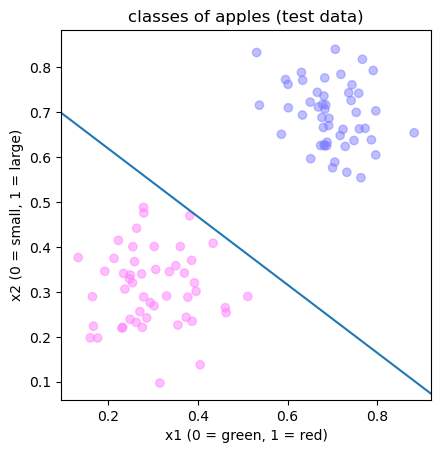

In [5]:
# generate test data
means = (0.3,0.7)
sigma = 0.08
ndatapoints = 50
data_output_test = generate_data(means, sigma, ndatapoints)
data_test = data_output_test[0]
randvec_test = data_output_test[1]

# show generated data and decision boundary
colors_test = np.concatenate((np.matlib.repmat(np.array([1, 0.5, 1]),ndatapoints,1),np.matlib.repmat(np.array([0.5, 0.5, 1]),ndatapoints,1)))
colors_test = colors_test[randvec_test,:]
figi_test = 3; plt.figure(figi_test)
plt.scatter(data_test[:,0], data_test[:,1], c=colors_test, alpha=0.5)
plt.axis('square')
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (test data)')
plot_boundary(weights)

# test
predictions = test(data_test, weights)
labels_test = data_test[:,2]
errors = labels_test - predictions # nonzero entries indicate errors
nerrors = np.sum(errors**2)
print(nerrors/labels_test.shape)